### Načtení potřebných knihoven

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

### Načtení souboru, vymazání nepotřebných sloupců

In [2]:
data = pd.read_csv('/Users/andrepolescuk/Documents/Projekty/projekty/demogaf_data/data/OBY01BHVD.csv') # create a dataframe from porodnost dataset
data # brief lookaround on shape, size and unique values of the dataframe
# deleting unnecessary columns 
del data['Uz012']
del data['CasR']
del data['IndicatorType']


### Vytvoření masek pro jednotlivé kategorie

In [3]:
# create a masks (filtering data for each subcategory of events)
prirozeny_prirustek = data['Ukazatel'] == 'Přirozený přírůstek/úbytek na 1 000 obyvatel' # mask for natural increase/decrease of population
prirustek_stehovanim = data['Ukazatel'] == 'Přírůstek/úbytek stěhováním na 1 000 obyvatel' # mask for increase/descrease of of population by moving out
celkovy_prirustek = data['Ukazatel'] == 'Celkový přírůstek/úbytek na 1 000 obyvatel' # mask for overall increase/descrease of population

# mask (filtering) for three Czech regions
praha = data['ČR, Reg. soudržnosti, Kraje'] == 'Hlavní město Praha' # mask for Major city of Prague
moravs_kraj = data['ČR, Reg. soudržnosti, Kraje'] == 'Moravskoslezský kraj' # mask for Moravskoslezsky region
hradec_kraj = data['ČR, Reg. soudržnosti, Kraje'] == 'Královéhradecký kraj' # mask for Kralovehradecky region

### Aplikace masky pro přirozený přírůstek v Praze

/var/folders/c7/f7_gf6rx28z5zt1fkk8ddk1m0000gn/T/ipykernel_60543/1675506001.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  prirozeny_prirustek_praha = data_celkem[prirozeny_prirustek] # applying filter for natural increase/decrease in Prague


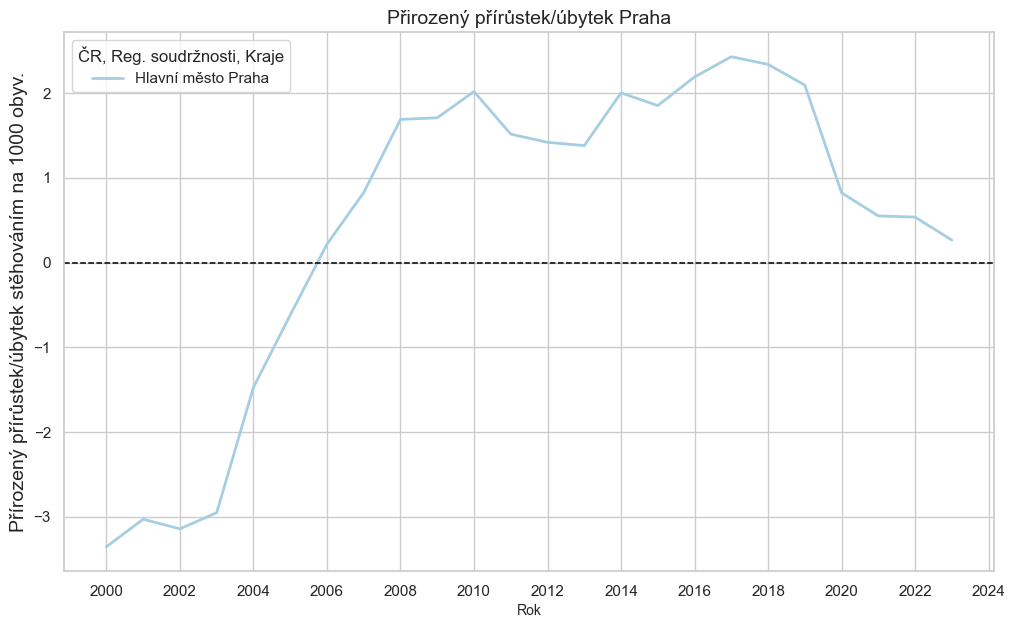

In [4]:
# mask for natural increase/decrease of population in Prague
data_celkem = data[praha] # taking Prague rows 
prirozeny_prirustek_praha = data_celkem[prirozeny_prirustek] # applying filter for natural increase/decrease in Prague

# plot preparationg
sns.set_theme(style="whitegrid") # taking whitegrig style plot, using Seaborn library
plt.figure(figsize=(12, 7)) # adjusting size of plot

# creating plot by passing necessary argument
graf_prir_praha = sns.lineplot(data=prirozeny_prirustek_praha, x='Roky', y='Hodnota', hue='ČR, Reg. soudržnosti, Kraje',
                                  markers=True, markersize=7, palette=('Paired'), linewidth=2.0)

# styling the plot 
plt.title('Přirozený přírůstek/úbytek Praha', fontsize=14)
plt.xlabel('Rok', fontsize=10)
# Creating a description for y axis
plt.ylabel('Přírozený přírůstek/úbytek stěhováním na 1000 obyv.', fontsize=14)
plt.axhline(0, color='black', linestyle='--', linewidth=1.1, alpha=1.0)
ax = plt.gca() # taking an axis for further stylisation of the plot
# Editing the x axis (years/roky)
ax = plt.gca() # taking current axises for further settings
ax.xaxis.set_major_locator(mticker.MultipleLocator(2)) # Maint point and descriptiong fof every two years
ax.xaxis.set_minor_locator(mticker.MultipleLocator(2)) # Side points for every two years (softer division)
plt.xticks(rotation=0) # no need for rotation, plot is not that big
# Ediiting the y axis
ax.yaxis.set_major_locator(mticker.MultipleLocator(1)) # main point for every point of value
ax.yaxis.set_minor_locator(mticker.MultipleLocator(1)) # side point for every piece of information

### Aplikace masky pro přirozený přírůstek v MSK

/var/folders/c7/f7_gf6rx28z5zt1fkk8ddk1m0000gn/T/ipykernel_60543/1215787997.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  prirozeny_prirustek_msk = data_celkem[prirozeny_prirustek] # applying filter for natural increase/decrease in MSK


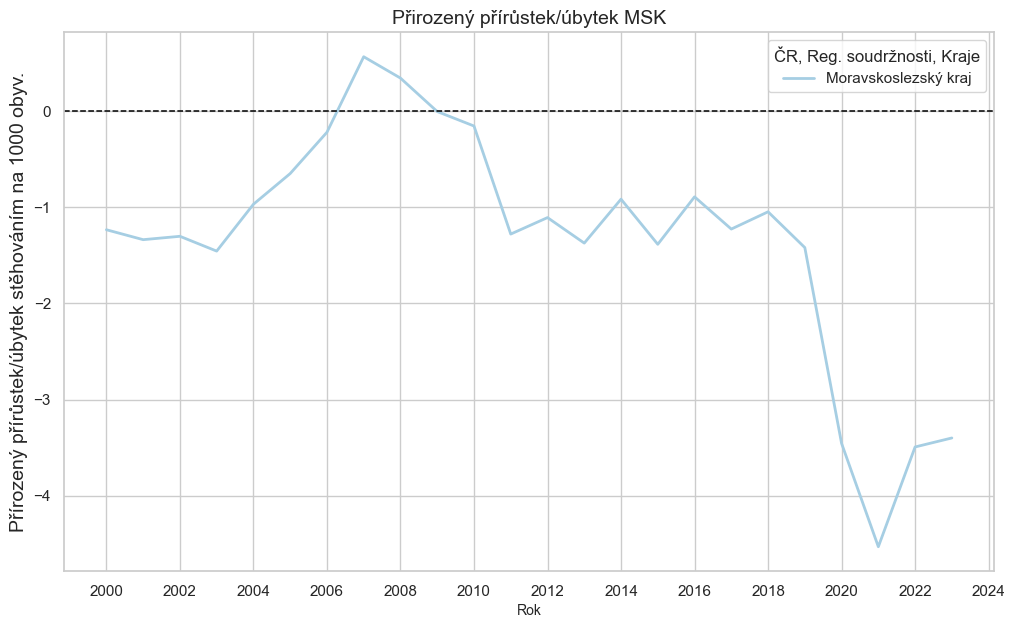

In [5]:
# mask for natural increase/decrease of population in MSK
data_celkem = data[moravs_kraj] # taking MSK rows 
prirozeny_prirustek_msk = data_celkem[prirozeny_prirustek] # applying filter for natural increase/decrease in MSK

# plot preparationg
sns.set_theme(style="whitegrid") # taking whitegrig style plot, using Seaborn library
plt.figure(figsize=(12, 7)) # adjusting size of plot

# plot creationg
graf_prir_praha = sns.lineplot(data=prirozeny_prirustek_msk, x='Roky', y='Hodnota', hue='ČR, Reg. soudržnosti, Kraje',
                                  markers=True, markersize=7, palette=('Paired'), linewidth=2.0)

# styling the plot 
plt.title('Přirozený přírůstek/úbytek MSK', fontsize=14)
plt.xlabel('Rok', fontsize=10)
# Creating a description for the y axis
plt.ylabel('Přírozený přírůstek/úbytek stěhováním na 1000 obyv.', fontsize=14)
plt.axhline(0, color='black', linestyle='--', linewidth=1.1, alpha=1.0)
ax = plt.gca() # taking an axis for further stylisation of the plot
# Editing the x axis (years/roky)
ax = plt.gca() # taking current axises for further settings
ax.xaxis.set_major_locator(mticker.MultipleLocator(2)) # Main point and descriptiong fof every two years
ax.xaxis.set_minor_locator(mticker.MultipleLocator(2)) # Side points for every two years (softer division)
plt.xticks(rotation=0) # no need for rotation, plot is not that big
# Ediiting the y axis
ax.yaxis.set_major_locator(mticker.MultipleLocator(1)) # main point for every of point of value
ax.yaxis.set_minor_locator(mticker.MultipleLocator(1)) # side point for every piece of information

### Aplikace masky pro přírůstek stěhováním v Praze

/var/folders/c7/f7_gf6rx28z5zt1fkk8ddk1m0000gn/T/ipykernel_60543/3006173361.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  stehovani_prg = data_celkem[prirustek_stehovanim] # applying filter for increase/decrease of population to/from Prague


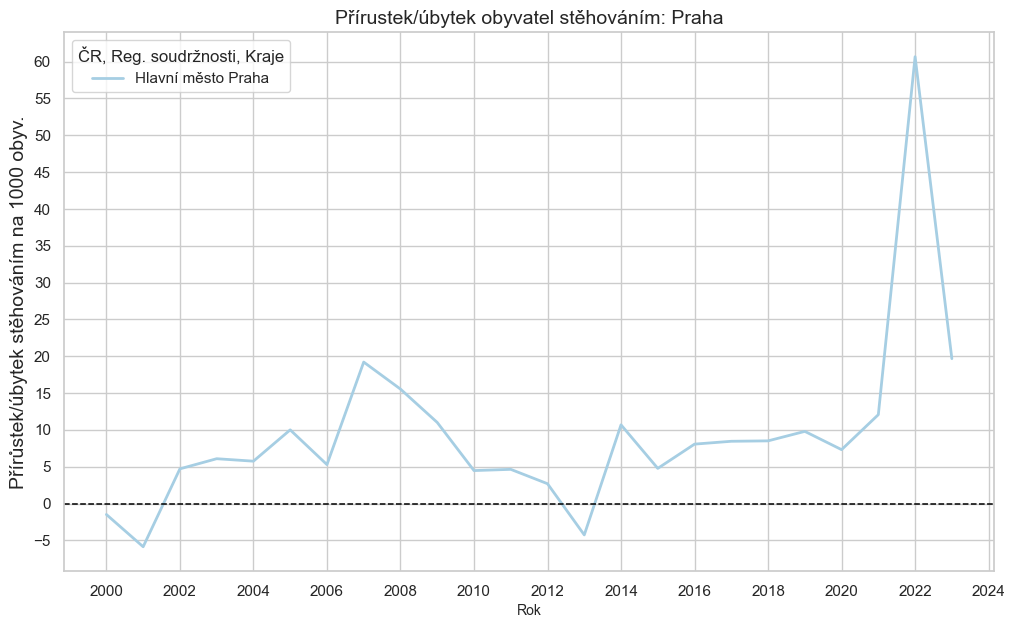

In [6]:
# mask for increase/descrease of population by moving to/from Prague
data_celkem = data[praha] # taking Prague rows 
stehovani_prg = data_celkem[prirustek_stehovanim] # applying filter for increase/decrease of population to/from Prague

# plot preparation
sns.set_theme(style="whitegrid") # taking whitegrid style plot, using Seaborn library
plt.figure(figsize=(12, 7)) # adjusting size of plot

# plot creation, passing necessary arguments
graf_steh_prg = sns.lineplot(data=stehovani_prg, x='Roky', y='Hodnota', hue='ČR, Reg. soudržnosti, Kraje',
                                  markers=True, markersize=7, palette=('Paired'), linewidth=2.0)

# styling the plot 
plt.title('Přírustek/úbytek obyvatel stěhováním: Praha', fontsize=14) 
plt.xlabel('Rok', fontsize=10)
# Creating a description for y axis 
plt.ylabel('Přírůstek/úbytek stěhováním na 1000 obyv.', fontsize=14)
plt.axhline(0, color='black', linestyle='--', linewidth=1.1, alpha=1.0)
ax = plt.gca() # taking an axis for further stylisation of the plot
# Editing the x axis (years/roky)
ax = plt.gca() # taking current axises for further settings
ax.xaxis.set_major_locator(mticker.MultipleLocator(2)) # Main point and descriptiong fof every two years
ax.xaxis.set_minor_locator(mticker.MultipleLocator(1)) # Side points for every year (softer division)
plt.xticks(rotation=0) # no need for rotation, plot is not that big
# Ediiting the y axis
ax.yaxis.set_major_locator(mticker.MultipleLocator(5)) # main point for for every five points of values
ax.yaxis.set_minor_locator(mticker.MultipleLocator(1)) # side point for every piece of information

### Aplikace masky pro přírůstek stěhováním v MSK

/var/folders/c7/f7_gf6rx28z5zt1fkk8ddk1m0000gn/T/ipykernel_60543/3983764044.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  stehovani_msk = data_celkem[prirustek_stehovanim] # applying filter for increase/decrease of population by moving to/from MSK


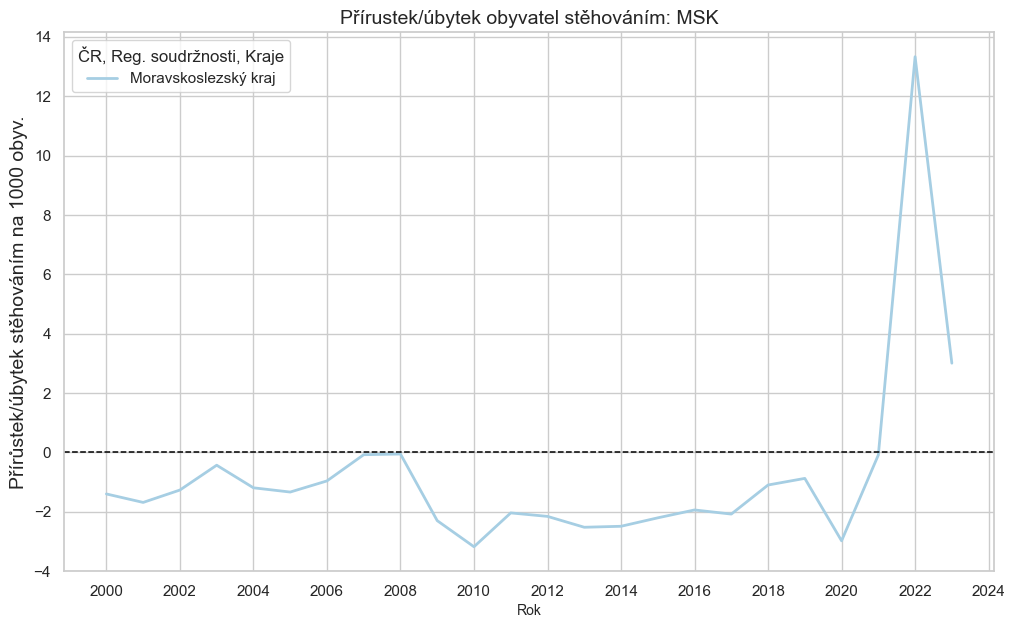

In [7]:
# mask for increase/descrease of population by moving to/from MSK
data_celkem = data[moravs_kraj] # taking MSK rows
stehovani_msk = data_celkem[prirustek_stehovanim] # applying filter for increase/decrease of population by moving to/from MSK

# plot preparation
sns.set_theme(style="whitegrid")  # taking whitegrid style plot, using Seaborn library
plt.figure(figsize=(12, 7)) # adjusting size of plot

# plot creation, passing necessary arguments
graf_steh_msk = sns.lineplot(data=stehovani_msk, x='Roky', y='Hodnota', hue='ČR, Reg. soudržnosti, Kraje',
                                  markers=True, markersize=7, palette=('Paired'), linewidth=2.0)

# styling the plot 
plt.title('Přírustek/úbytek obyvatel stěhováním: MSK', fontsize=14)
plt.xlabel('Rok', fontsize=10)
# Creating a description for y axis
plt.ylabel('Přírůstek/úbytek stěhováním na 1000 obyv.', fontsize=14)
plt.axhline(0, color='black', linestyle='--', linewidth=1.1, alpha=1.0)
ax = plt.gca() # taking an axis for further stylisation of the plot
# Editing the x axis (years/roky)
ax = plt.gca() # taking current axises for further settings
ax.xaxis.set_major_locator(mticker.MultipleLocator(2)) # Main point and descriptiong fof every two years
ax.xaxis.set_minor_locator(mticker.MultipleLocator(1)) # Side points for every year (softer division)
plt.xticks(rotation=0) # no need for rotation, plot is not that big
# Ediiting the y axis
ax.yaxis.set_major_locator(mticker.MultipleLocator(2)) # main point for for every two points of values
ax.yaxis.set_minor_locator(mticker.MultipleLocator(1)) # side point for every piece of information

### Aplikace masky pro celkový přírůstek v Praze

/var/folders/c7/f7_gf6rx28z5zt1fkk8ddk1m0000gn/T/ipykernel_60543/2419217648.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  celk_prir_ubyt_prg = data_celkem[celkovy_prirustek] # applying filter for overall increase/decrease of population in Prague


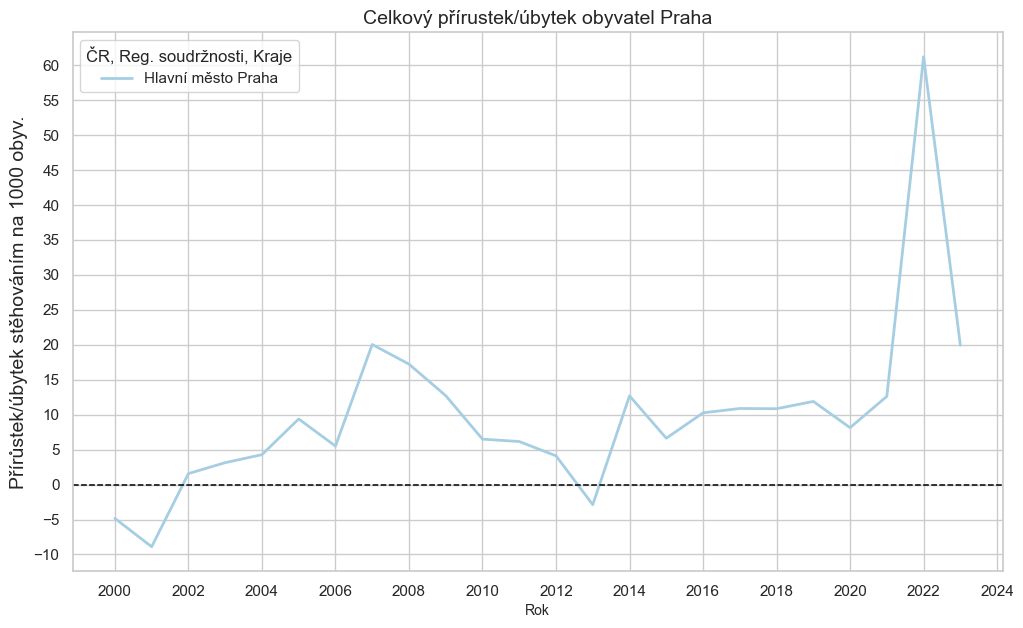

In [8]:
# mask for overall increase/descrease of population in Prague
data_celkem = data[praha] # taking Prague rows
celk_prir_ubyt_prg = data_celkem[celkovy_prirustek] # applying filter for overall increase/decrease of population in Prague

# plot preparation
sns.set_theme(style="whitegrid") # taking whitegrid style plot, using Seaborn library
plt.figure(figsize=(12, 7)) # adjusting size of plot

# plot creation, passing necessary arguments
graf_prib_ubyt_prg = sns.lineplot(data=celk_prir_ubyt_prg, x='Roky', y='Hodnota', hue='ČR, Reg. soudržnosti, Kraje',
                                  markers=True, markersize=7, palette=('Paired'), linewidth=2.0)

# styling the plot 
plt.title('Celkový přírustek/úbytek obyvatel Praha', fontsize=14)
plt.xlabel('Rok', fontsize=10)
# Creating a description for y axis
plt.ylabel('Přírůstek/úbytek stěhováním na 1000 obyv.', fontsize=14)
plt.axhline(0, color='black', linestyle='--', linewidth=1.1, alpha=1.0)
ax = plt.gca() # taking an axis for further stylisation of the plot
# Editing the x axis (years/roky)
ax = plt.gca() # taking current axises for further settings
ax.xaxis.set_major_locator(mticker.MultipleLocator(2)) # Main point and descriptiong fof every two years
ax.xaxis.set_minor_locator(mticker.MultipleLocator(1)) # Side points for every year (softer division)
plt.xticks(rotation=0) # no need for rotation, plot is not that big
# Ediiting the y axis
ax.yaxis.set_major_locator(mticker.MultipleLocator(5)) # main point for for every five points of value
ax.yaxis.set_minor_locator(mticker.MultipleLocator(1)) # side point for every piece of information

### Aplikace masky pro celkový přírůstek v MSK

/var/folders/c7/f7_gf6rx28z5zt1fkk8ddk1m0000gn/T/ipykernel_60543/1949525796.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  celk_prir_ubyt_msk = data_celkem[celkovy_prirustek] # applying filter for overall increase/decrease of population in MSK


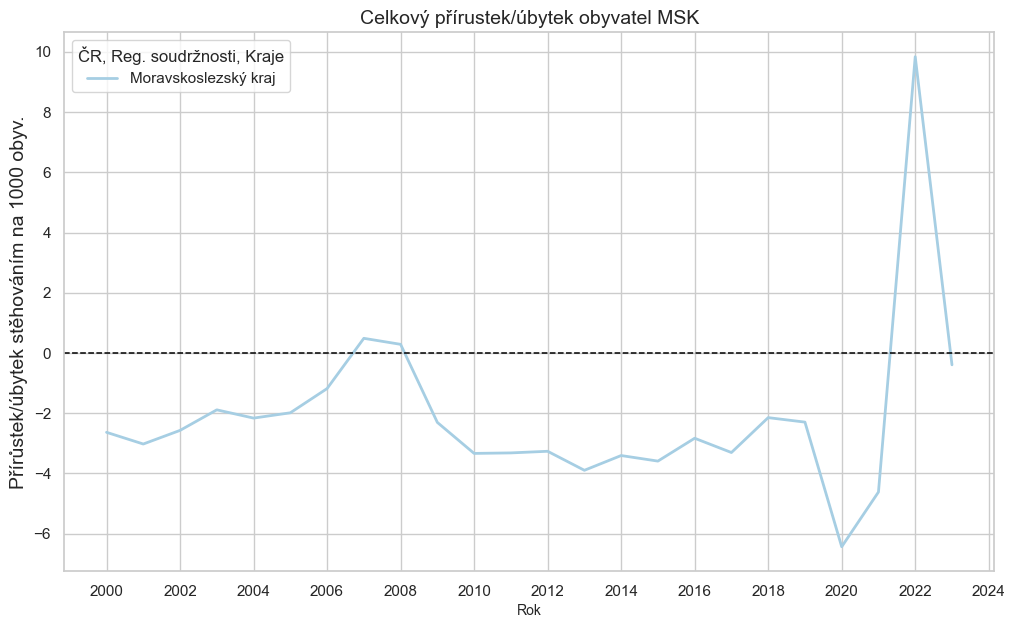

In [9]:
# mask for overall increase/descrease of population in MSK
data_celkem = data[moravs_kraj] # taking MSK rows
celk_prir_ubyt_msk = data_celkem[celkovy_prirustek] # applying filter for overall increase/decrease of population in MSK
celk_prir_ubyt_msk

# plot preparation
sns.set_theme(style="whitegrid") # taking whitegrid style plot, using Seaborn library
plt.figure(figsize=(12, 7)) # adjusting size of plot

# plot creation, passing necessary arguments
graf_prib_ubyt_msk = sns.lineplot(data=celk_prir_ubyt_msk, x='Roky', y='Hodnota', hue='ČR, Reg. soudržnosti, Kraje',
                                  markers=True, markersize=7, palette=('Paired'), linewidth=2.0)

# styling the plot 
plt.title('Celkový přírustek/úbytek obyvatel MSK', fontsize=14)
plt.xlabel('Rok', fontsize=10)
# Creating a description for y axis
plt.ylabel('Přírůstek/úbytek stěhováním na 1000 obyv.', fontsize=14)
plt.axhline(0, color='black', linestyle='--', linewidth=1.1, alpha=1.0)
ax = plt.gca() # taking an axis for further stylisation of the plot
# Editing the x axis (years/roky)
ax = plt.gca() # taking current axises for further settings
ax.xaxis.set_major_locator(mticker.MultipleLocator(2)) # Main point and descriptiong for every two years
ax.xaxis.set_minor_locator(mticker.MultipleLocator(1)) # Side points for every year (softer division)
plt.xticks(rotation=0) # no need for rotation, plot is not that big
# Ediiting the y axis
ax.yaxis.set_major_locator(mticker.MultipleLocator(2)) # main point for for every two points of values
ax.yaxis.set_minor_locator(mticker.MultipleLocator(1)) # side point for every piece of information

### Aplikace masky pro přirozený přírůstek v KHK

/var/folders/c7/f7_gf6rx28z5zt1fkk8ddk1m0000gn/T/ipykernel_60543/952982577.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  prirozeny_prirustek_hk = data_celkem[prirozeny_prirustek] # applying filter for natural increase/decrease in KHK


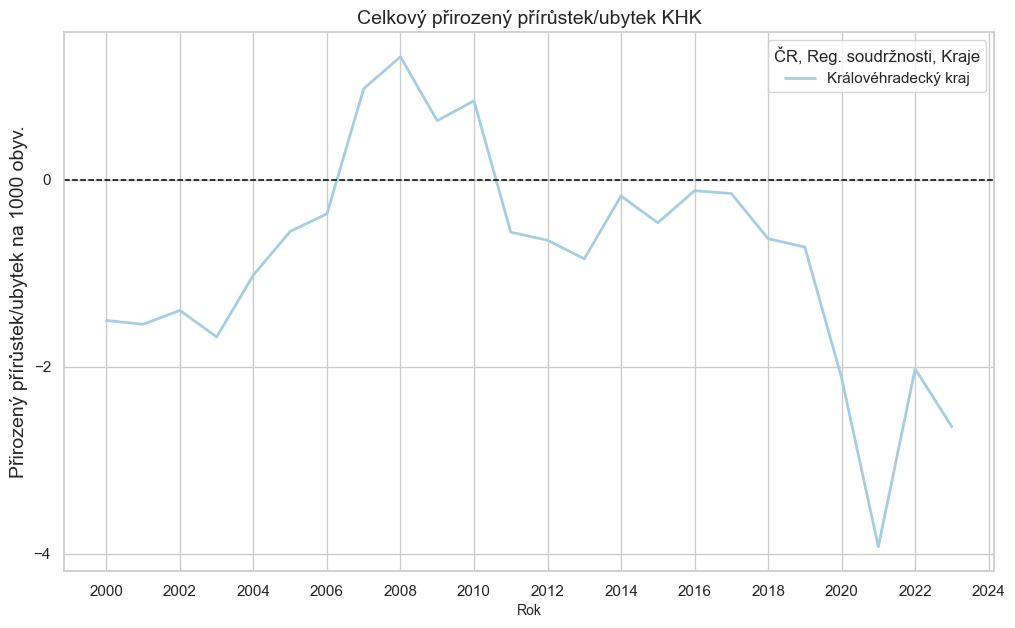

In [10]:
# mask for natural increase/decrease of population in KHK
data_celkem = data[hradec_kraj] # taking KHK rows 
prirozeny_prirustek_hk = data_celkem[prirozeny_prirustek] # applying filter for natural increase/decrease in KHK

# plot preparation
sns.set_theme(style="whitegrid") # taking whitegrid style plot, using Seaborn library
plt.figure(figsize=(12, 7)) # adjusting size of plot

# plot creation, passing necessary arguments
graf_prir_priz_hk = sns.lineplot(data=prirozeny_prirustek_hk, x='Roky', y='Hodnota', hue='ČR, Reg. soudržnosti, Kraje',
                                  markers=True, markersize=7, palette=('Paired'), linewidth=2.0)

# styling the plot 
plt.title('Celkový přirozený přírůstek/ubytek KHK', fontsize=14)
plt.xlabel('Rok', fontsize=10)
# Creating a description for y axis
plt.ylabel('Přirozený přírůstek/ubytek na 1000 obyv.', fontsize=14)
plt.axhline(0, color='black', linestyle='--', linewidth=1.1, alpha=1.0)
ax = plt.gca() # taking an axis for further stylisation of the plot
# Editing the x axis (years/roky)
ax = plt.gca() # taking current axises for further settings
ax.xaxis.set_major_locator(mticker.MultipleLocator(2)) # Main point and descriptiong for every two years
ax.xaxis.set_minor_locator(mticker.MultipleLocator(1)) # Side points for every year (softer division)
plt.xticks(rotation=0) # no need for rotation, plot is not that big
# Ediiting the y axis
ax.yaxis.set_major_locator(mticker.MultipleLocator(2)) # main point for for every two points of values
ax.yaxis.set_minor_locator(mticker.MultipleLocator(1)) # side point for every piece of information

### Aplikace masky pro přírůstek stěhováním KHK

/var/folders/c7/f7_gf6rx28z5zt1fkk8ddk1m0000gn/T/ipykernel_60543/2935176581.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  stehovani_hk = data_celkem[prirustek_stehovanim] # applying filter for increase/decrease of population by moving to/from KHK


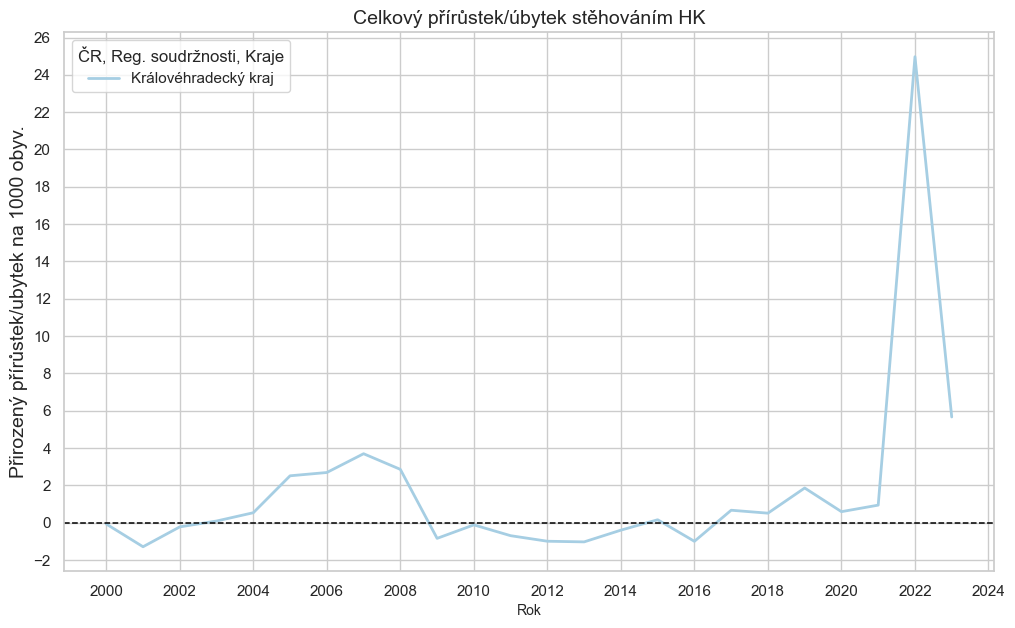

In [11]:
# mask for increase/descrease of population by moving to/from KHK
data_celkem = data[hradec_kraj] # taking KHK rows 
stehovani_hk = data_celkem[prirustek_stehovanim] # applying filter for increase/decrease of population by moving to/from KHK

# plot preparation
sns.set_theme(style="whitegrid") # taking whitegrid style plot, using Seaborn library
plt.figure(figsize=(12, 7)) # adjusting size of plot

# plot creation, passing necessary arguments
graf_prir_priz_hk = sns.lineplot(data=stehovani_hk, x='Roky', y='Hodnota', hue='ČR, Reg. soudržnosti, Kraje',
                                  markers=True, markersize=7, palette=('Paired'), linewidth=2.0)

# styling the plot 
plt.title('Celkový přírůstek/úbytek stěhováním HK', fontsize=14)
plt.xlabel('Rok', fontsize=10)
# Creating a description for y axis
plt.ylabel('Přirozený přírůstek/ubytek na 1000 obyv.', fontsize=14)
plt.axhline(0, color='black', linestyle='--', linewidth=1.1, alpha=1.0)
ax = plt.gca() # taking an axis for further stylisation of the plot
# Editing the x axis (years/roky)
ax = plt.gca() # taking current axises for further settings
ax.xaxis.set_major_locator(mticker.MultipleLocator(2)) # Main point and descriptiong for every two years
ax.xaxis.set_minor_locator(mticker.MultipleLocator(1)) # Side points for every year (softer division)
plt.xticks(rotation=0) # no need for rotation, plot is not that big
# Ediiting the y axis
ax.yaxis.set_major_locator(mticker.MultipleLocator(2)) # main point for for every two points of values
ax.yaxis.set_minor_locator(mticker.MultipleLocator(1)) # side point for every piece of information

### Aplikace masky pro celkový přírůstkem KHK

/var/folders/c7/f7_gf6rx28z5zt1fkk8ddk1m0000gn/T/ipykernel_60543/3185906880.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  celk_prir_ubyt_hk = celkem_data[celkovy_prirustek] # applying filter for overall increase/decrease of population in KHK


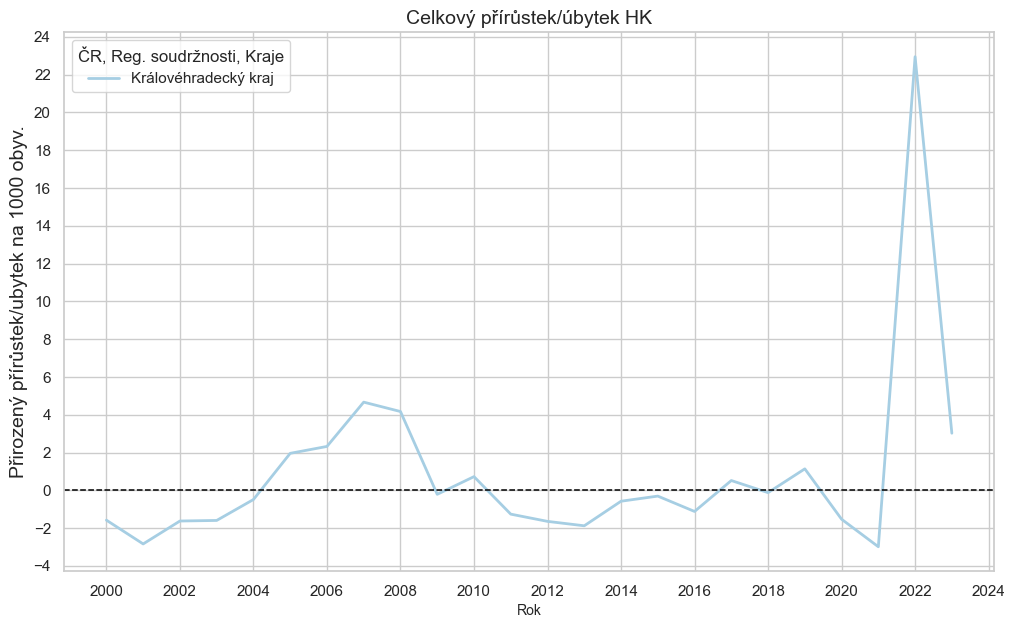

In [12]:
# mask for overall increase/descrease of population in KHK
celkem_data = data[hradec_kraj] # taking KHK rows
celk_prir_ubyt_hk = celkem_data[celkovy_prirustek] # applying filter for overall increase/decrease of population in KHK

# plot preparation
sns.set_theme(style="whitegrid") # taking whitegrid style plot, using Seaborn library
plt.figure(figsize=(12, 7)) # adjusting size of plot

# plot creation, passing necessary arguments
graf_prir_priz_hk = sns.lineplot(data=celk_prir_ubyt_hk, x='Roky', y='Hodnota', hue='ČR, Reg. soudržnosti, Kraje',
                                  markers=True, markersize=7, palette=('Paired'), linewidth=2.0)

# styling the plot 
plt.title('Celkový přírůstek/úbytek HK', fontsize=14)
plt.xlabel('Rok', fontsize=10)
# Creating a description for y axis
plt.ylabel('Přirozený přírůstek/ubytek na 1000 obyv.', fontsize=14)
plt.axhline(0, color='black', linestyle='--', linewidth=1.1, alpha=1.0)
ax = plt.gca() # taking an axis for further stylisation of the plot
# Editing the x axis (years/roky)
ax = plt.gca() # taking current axises for further settings
ax.xaxis.set_major_locator(mticker.MultipleLocator(2)) # Main point and descriptiong for every two years
ax.xaxis.set_minor_locator(mticker.MultipleLocator(1)) # Side points for every year (softer division)
plt.xticks(rotation=0) # no need for rotation, plot is not that big
# Ediiting the y axis
ax.yaxis.set_major_locator(mticker.MultipleLocator(2)) # main point for for every two points of values
ax.yaxis.set_minor_locator(mticker.MultipleLocator(1)) # side point for every piece of information

### Aplikace masky pro přirozený přírůstek v Praze, MSK a KHK

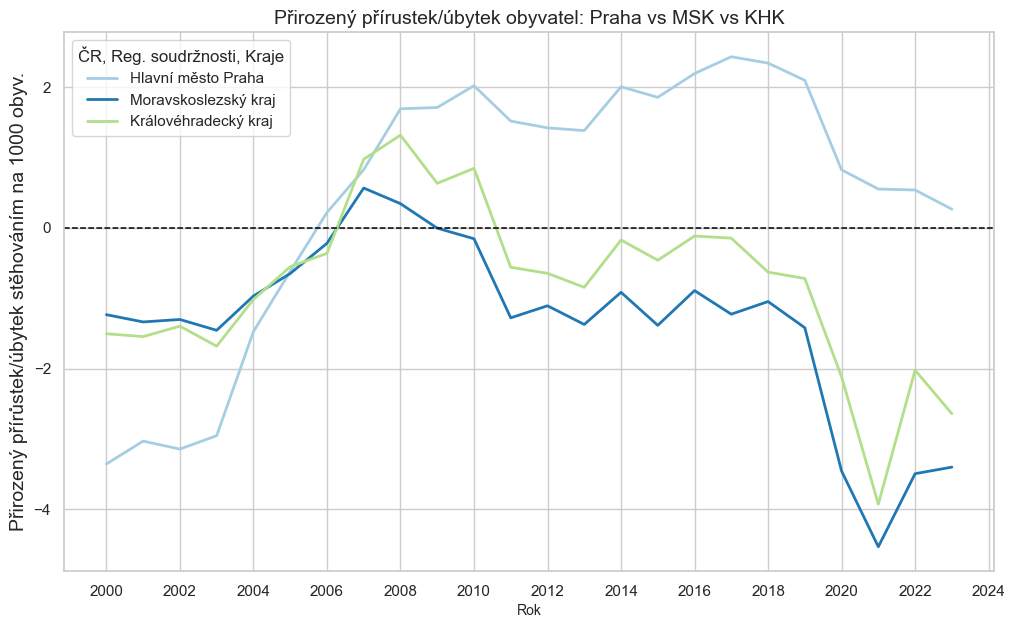

In [13]:
# plot preparation
sns.set_theme(style="whitegrid") # taking whitegrid style plot, using Seaborn library
plt.figure(figsize=(12, 7)) # adjusting size of plot
# combining data of overall increase/decrease of population in all three region
combined_data = pd.concat([prirozeny_prirustek_praha, prirozeny_prirustek_msk, prirozeny_prirustek_hk], ignore_index=True) # concatenating three tables, ignoring index to avoid index error
styles = sns.axes_style('dark')

# plot creation, passing necessary arguments
graf_combined_data = sns.lineplot(data=combined_data, x='Roky', y='Hodnota', hue='ČR, Reg. soudržnosti, Kraje',
                                  markers=True, markersize=7, palette=('Paired'), linewidth=2.0)

# styling the plot 
plt.title('Přirozený přírustek/úbytek obyvatel: Praha vs MSK vs KHK', fontsize=14)
plt.xlabel('Rok', fontsize=10)
# Creating a description for y axis
plt.ylabel('Přirozený přírůstek/úbytek stěhováním na 1000 obyv.', fontsize=14)
plt.axhline(0, color='black', linestyle='--', linewidth=1.1, alpha=1.0)
ax = plt.gca() # taking an axis for further stylisation of the plot
# Editing the x axis (years/roky)
ax = plt.gca() # taking current axises for further settings
ax.xaxis.set_major_locator(mticker.MultipleLocator(2)) # Main point and descriptiong for every two years
ax.xaxis.set_minor_locator(mticker.MultipleLocator(2)) # Side points for every year (softer division)
plt.xticks(rotation=0) # no need for rotation, plot is not that big
# Ediiting the y axis
ax.yaxis.set_major_locator(mticker.MultipleLocator(2)) # main point for for every five points of values
ax.yaxis.set_minor_locator(mticker.MultipleLocator(1)) # side point for every piece of information

### Aplikace masky pro přírůstek stěhováním v Praze, MSK a KHK

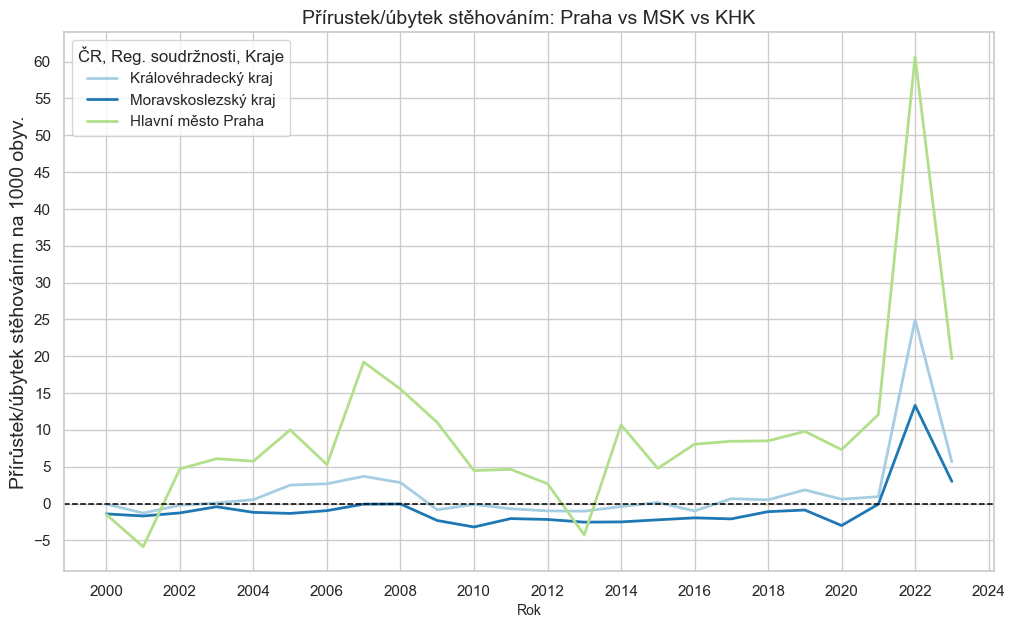

In [14]:
# plot preparation
sns.set_theme(style="whitegrid") # taking whitegrid style plot, using Seaborn library
plt.figure(figsize=(12, 7)) # adjusting size of plot
# combining data of increase/decrease of population by moviting to/out in all three region
combined_data = pd.concat([stehovani_hk, stehovani_msk,  stehovani_prg], ignore_index=True) # concatenating three tables, ignoring index to avoid index error
styles = sns.axes_style('dark')
# plot creation, passing necessary arguments
graf_combined_data = sns.lineplot(data=combined_data, x='Roky', y='Hodnota', hue='ČR, Reg. soudržnosti, Kraje',
                                  markers=True, markersize=7, palette=('Paired'), linewidth=2.0)

# styling the plot 
plt.title('Přírustek/úbytek stěhováním: Praha vs MSK vs KHK', fontsize=14)
plt.xlabel('Rok', fontsize=10)
# Creating a description for y axis
plt.ylabel('Přírůstek/úbytek stěhováním na 1000 obyv.', fontsize=14)
plt.axhline(0, color='black', linestyle='--', linewidth=1.1, alpha=1.0)
ax = plt.gca() # taking an axis for further stylisation of the plot
# Editing the x axis (years/roky)
ax = plt.gca() # taking current axises for further settings
ax.xaxis.set_major_locator(mticker.MultipleLocator(2)) # Main point and descriptiong for every two years
ax.xaxis.set_minor_locator(mticker.MultipleLocator(1)) # Side points for every year (softer division)
plt.xticks(rotation=0) # no need for rotation, plot is not that big
# Ediiting the y axis
ax.yaxis.set_major_locator(mticker.MultipleLocator(5)) # main point for for every five points of values
ax.yaxis.set_minor_locator(mticker.MultipleLocator(1)) # side point for every piece of information

### Aplikace masky pro celkový přírůstek v Praze, MSK a KHK

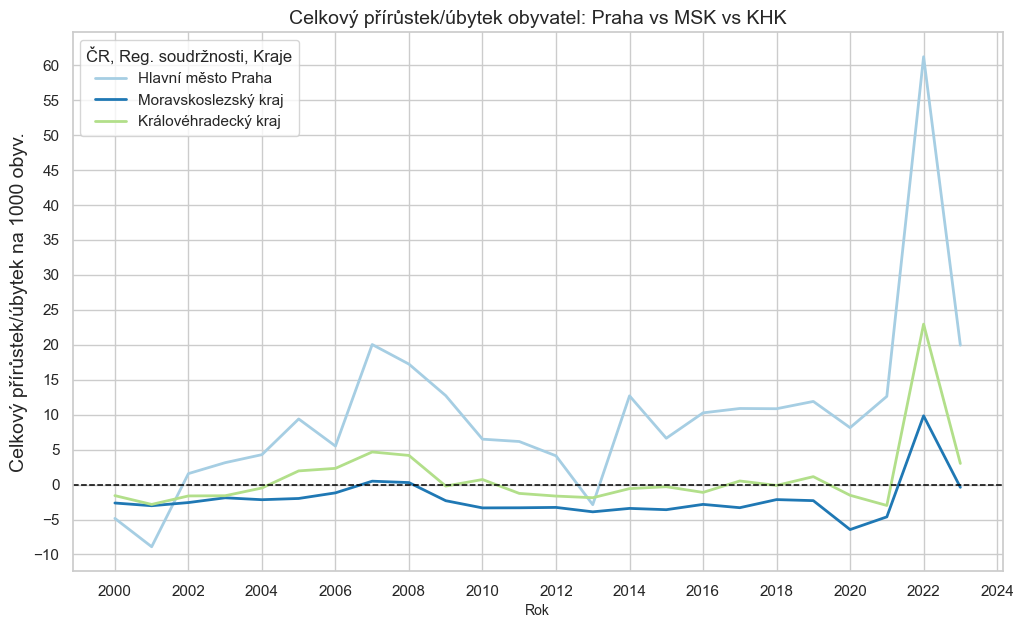

In [15]:
# plot preparation
sns.set_theme(style="whitegrid") # taking whitegrid style plot, using Seaborn library
plt.figure(figsize=(12, 7)) # adjusting size of plot
# combining data of increase/decrease of population by moviting to/out in all three region
combined_data = pd.concat([celk_prir_ubyt_prg, celk_prir_ubyt_msk,  celk_prir_ubyt_hk], ignore_index=True) # concatenating three tables, ignoring index to avoid index error
styles = sns.axes_style('dark')
# plot creation, passing necessary arguments
graf_combined_data = sns.lineplot(data=combined_data, x='Roky', y='Hodnota', hue='ČR, Reg. soudržnosti, Kraje',
                                  markers=True, markersize=7, palette=('Paired'), linewidth=2.0)

# styling the plot 
plt.title('Celkový přírůstek/úbytek obyvatel: Praha vs MSK vs KHK', fontsize=14)
plt.xlabel('Rok', fontsize=10)
# Creating a description for y axis
plt.ylabel('Celkový přírůstek/úbytek na 1000 obyv.', fontsize=14)
plt.axhline(0, color='black', linestyle='--', linewidth=1.1, alpha=1.0)
ax = plt.gca() # taking an axis for further stylisation of the plot
# Editing the x axis (years/roky)
ax = plt.gca() # taking current axises for further settings
ax.xaxis.set_major_locator(mticker.MultipleLocator(2)) # Main point and descriptiong for every two years
ax.xaxis.set_minor_locator(mticker.MultipleLocator(1)) # Side points for every year (softer division)
plt.xticks(rotation=0) # no need for rotation, plot is not that big
# Ediiting the y axis
ax.yaxis.set_major_locator(mticker.MultipleLocator(5)) # main point for for every five points of value
ax.yaxis.set_minor_locator(mticker.MultipleLocator(1)) # side point for every piece of information